In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

# TODO

 - Visualize gradient descent steps
 - 3d plot vis
 - convergence
 - test for convergence
 

In [2]:
data = np.genfromtxt('./ex1/ex1data1.txt', delimiter=',')
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

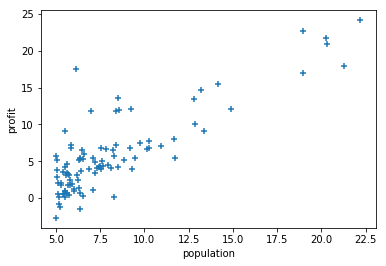

In [3]:
%matplotlib inline

m = len(data)

ones = np.ones((m, 1))
X = np.column_stack((ones, data[:, 0]))
y = data[:,1]

plt.scatter(X[:,1], y, marker='+')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [4]:
theta = np.zeros(2); # initialize fitting parameters
iterations = 1500;
alpha = 0.01;

def compute_cost(X, y, theta):
    m = len(X)
    h = X.dot(theta)
    return 1 / 2 / m * (h - y).dot(h - y)

def gradient_descent(X, y, theta, alpha, iterations):
    J_hist = []
    Theta_hist = []
    m = len(X)
    for _ in range(iterations):
        theta = theta - alpha / m * X.T.dot(X.dot(theta) - y)
        J_hist.append(compute_cost(X, y, theta))
        Theta_hist.append(theta)
    return (theta, J_hist, Theta_hist)


In [5]:
print('Expected cost value (approx) 32.07\n');
compute_cost(X, y, theta)

Expected cost value (approx) 32.07



32.07273387745567

In [6]:
print('Expected cost value (approx) 54.24\n');
compute_cost(X, y, np.array([-1, 2]))

Expected cost value (approx) 54.24



54.24245508201236

In [7]:
theta_final, J_hist, Theta_hist = gradient_descent(X, y, theta, alpha, iterations);
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');

print('Acthal theta: ', theta_final)

Expected theta values (approx)

 -3.6303
  1.1664


Acthal theta:  [-3.63029144  1.16636235]


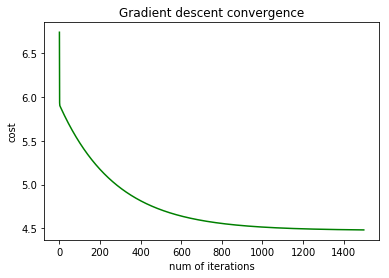

In [8]:
%matplotlib inline

plt.plot(np.arange(0, len(J_hist)), J_hist, 'g-')
plt.title('Gradient descent convergence')
plt.xlabel('num of iterations')
plt.ylabel('cost')
plt.show()

<IPython.core.display.Javascript object>


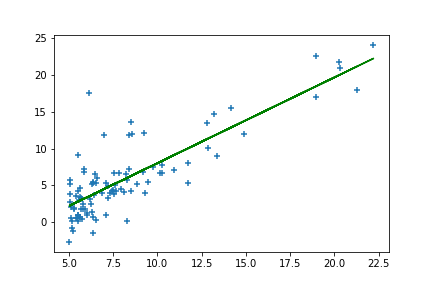

Text(0.5, 1.0, 'Training data with decision boundary')

<IPython.core.display.Javascript object>


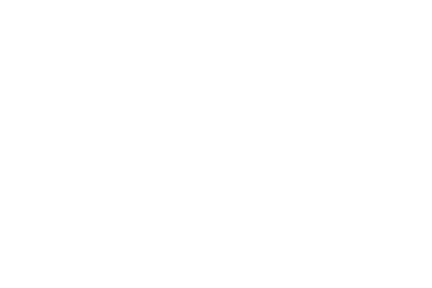

In [62]:
%matplotlib notebook

# https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook
# https://github.com/anujgupta82/Musings/blob/master/Dynamic%20or%20Live%20update%20of%20a%20Plot.ipynb

fig = plt.figure()
ax = fig.add_subplot(111)

for theta in Theta_hist[::20]:
    ax.clear()
    ax.scatter(X[:,1], y, marker='+')
    ax.plot(X[:,1], X.dot(theta), 'g-')
    fig.canvas.draw()
    plt.pause(0.01)

plt.title('Training data with decision boundary')
# plt.show()

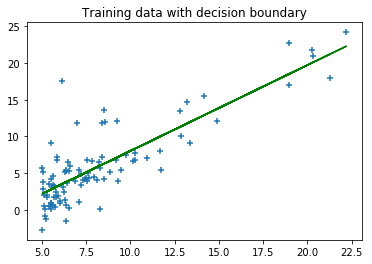

In [10]:
%matplotlib inline

plt.scatter(X[:,1], y, marker='+')
plt.plot(X[:,1], X.dot(theta_final), 'g-')
plt.title('Training data with decision boundary')
plt.show()

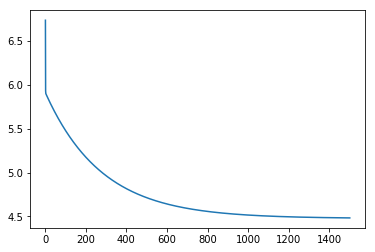

In [11]:
%matplotlib inline

plt.plot(np.arange(1, len(J_hist) + 1), J_hist)
plt.show()

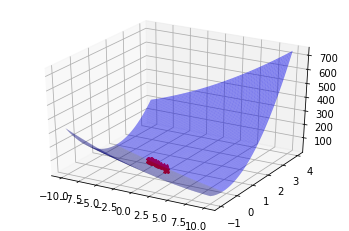

In [59]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.view_init(30, 160)

# # Make data.
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 200);

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

theta_vals = np.stack((theta0_vals, theta1_vals), axis=2)

def cost(theta):
    return compute_cost(X, y, np.array(theta));

J = np.apply_along_axis(cost, 2, theta_vals)

ax.plot_surface(theta0_vals, theta1_vals, J, rstride=1, cstride=1, color='b', alpha=0.5)

ax.plot(np.array(Theta_hist)[::100,0], np.array(Theta_hist)[::100,1], np.array(J_hist[::100]), 'rX')

plt.show()

Acthal theta:  [-3.89578088  1.19303364]


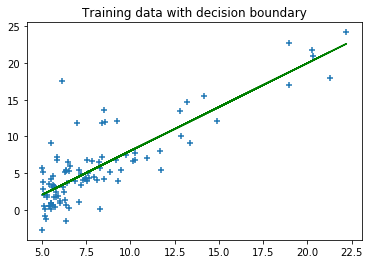

In [60]:
theta_norm = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('Acthal theta: ', theta_norm)

plt.scatter(X[:,1], y, marker='+')
plt.plot(X[:,1], X.dot(theta_norm), 'g-')
plt.title('Training data with decision boundary')
plt.show()